In [1]:
from shapeanalyzer.boundings import BoundingGeometry
from shapeanalyzer.calipers import RotatingCaliper
from shapeanalyzer.shapes import *
import math

points = []
fp = open("data/twpoi.csv")
lines = fp.readlines()
del lines[0]
for r in lines:
    r = r.strip().split(",")
    pt = Point(float(r[0]), float(r[1]))
    points.append(pt)
    
bg = BoundingGeometry(points)
bbox = bg.Envelope()
hull = bg.ConvexHull()
circle, support = bg.MinimumAreaCircle()
rect = bg.MinimumWidthRectangle()
rc = RotatingCaliper(hull)
antipodals = rc.AntiPodals()
diameter, dsup = rc.Diameter()
width, wsup = rc.Width()
#print bbox
#print hull
#print circle, support
#print antipodals
print diameter, dsup
print width, wsup
print rect

420494.770276 [Point ( 13440291.4138, 2502151.21565 ), Point ( 13533118.5107, 2912271.90752 )]
153288.683896 [Point ( 13516046.5536, 2647103.31229 ), Point ( 13566012.0844, 2818255.39528 ), Point ( 13375215.8206, 2711694.64256 )]
Rectangle ( Center: Point ( 13456338.7148, 2716076.57592 ), Axes: [Vector2 (0.28, 0.96), Vector2 (-0.96, 0.28)], Extents: [419701.04416897317, 153288.68389614674] )


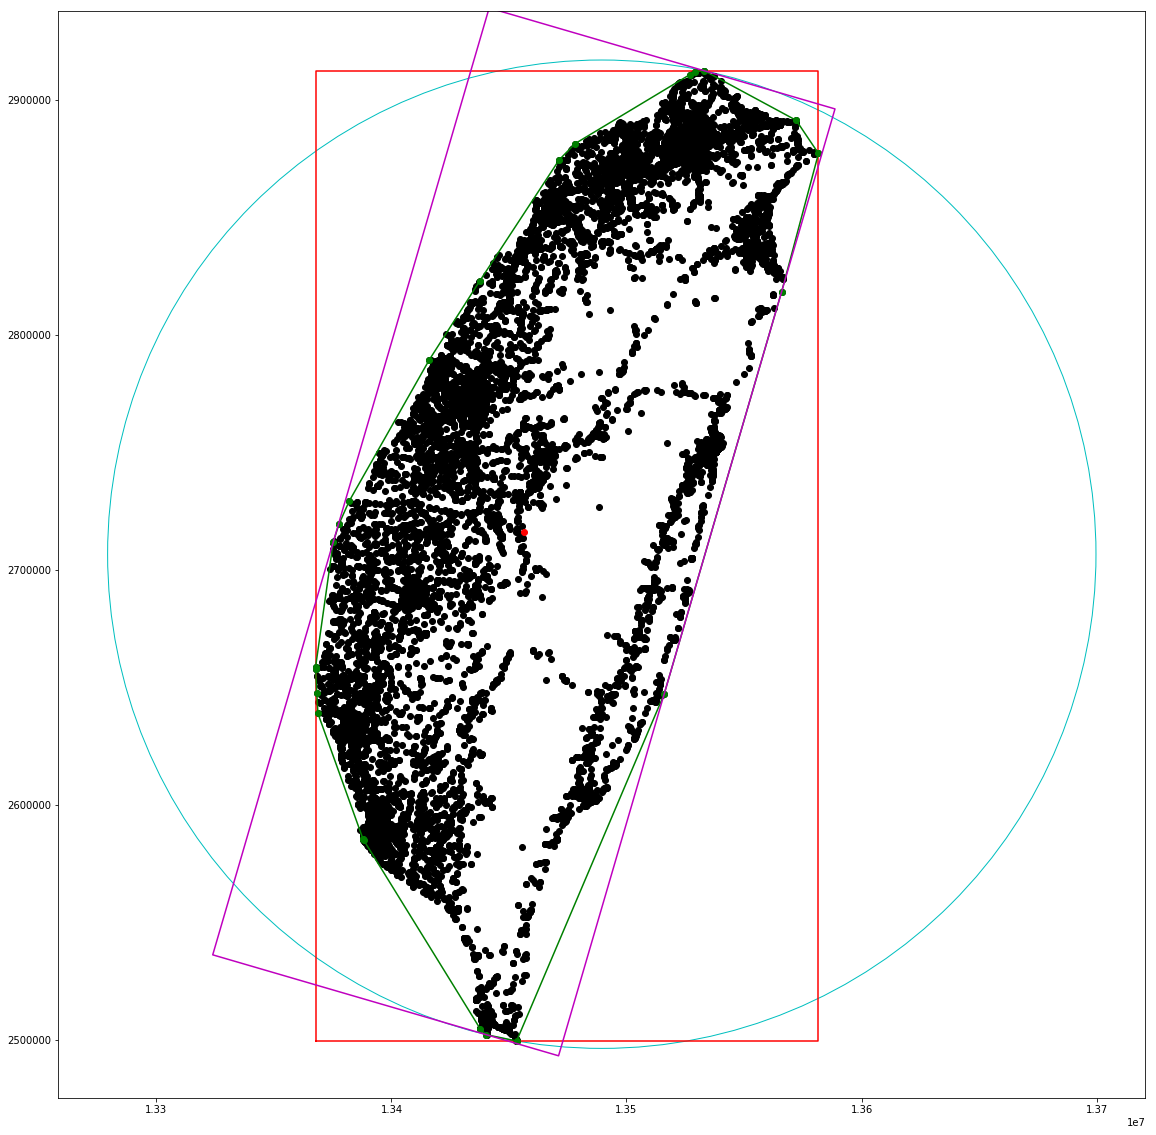

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.axis("equal")
fig_size = [20,20]
plt.rcParams["figure.figsize"] = fig_size

def plot_bbox(bbox):
    minx, miny, maxx, maxy = bbox
    xs = [minx, minx, maxx, maxx, minx]
    ys = [miny, maxy, maxy, miny, miny]
    plt.plot(xs,ys,'r')

def plot_poly(poly):
    parr = []
    for p in poly:
        parr.append(p.coords())
    parr.append(poly[0].coords())
    parr = np.asarray(parr)
    plt.plot(parr[:,0], parr[:,1],"g-o")

    
def plot_circle(circle):
    #plt.plot(circle.center.x, circle.center.y, "or")
    circle = plt.Circle((circle.center.x, circle.center.y), radius=circle.radius, color='c', fill=False)
    plt.gca().add_patch(circle)
    plt.axis('scaled')

def plot_rect(rect):
    plt.plot(rect.center.x, rect.center.y, "or")
    center = rect.center.coords()
    axx = [rect.axes[0].x,rect.axes[0].y]
    axy = [rect.axes[1].x,rect.axes[1].y]
    extx = rect.extents[0] / 2
    exty = rect.extents[1] / 2
    pt1 = np.asarray(center) + extx * np.asarray(axx) + exty * np.asarray(axy)
    pt2 = np.asarray(center) + extx * np.asarray(axx) - exty * np.asarray(axy)
    pt3 = np.asarray(center) - extx * np.asarray(axx) - exty * np.asarray(axy)
    pt4 = np.asarray(center) - extx * np.asarray(axx) + exty * np.asarray(axy)
    r = np.array([pt1,pt2,pt3,pt4,pt1])
    plt.plot(r[:,0], r[:,1],"m-")
parr = []
for p in points:
    pass
    parr.append(p.coords())
parr = np.asarray(parr)
plt.plot(parr[:,0], parr[:,1],"ko")
plot_bbox(bbox)
plot_poly(hull)
plot_circle(circle)
plot_rect(rect)

plt.show()



In [3]:
pts = [Point(0,0), Point(2,0), Point(2,3),Point(0,3)]
pl = Polygon(pts)
print pl.perimeter(), pl.area()

10.0 6.0


In [6]:
from shapeanalyzer.descriptors import ShapeDescriptor
import json
SD = ShapeDescriptor(Polygon(hull))
print json.dumps(SD.Descriptors(), indent=2)

{
  "Perimeter": 965409.9950867649, 
  "Circularity": 0.342781478251589, 
  "Area": 47611201206.578125, 
  "Convesness": 1.0, 
  "Curvature": 0.3652330296191309, 
  "Roundness": 0.641941453101358
}
